Function to find root of this project. This is not required when using the code normally

In [1]:
from pathlib import Path
import os

root = Path.cwd()

while not((root / 'requirements.txt').exists() and (root / 'README.md').exists()):
    root = root.parent

root = root / 'src'

os.chdir(root)
print(root)

c:\Users\mhidalgo\OneDrive\OneDrive - JLR\Projects\ML\src


# Start of actual code

In [2]:
import numpy as np
from skopt.learning import GaussianProcessRegressor
from skopt.learning.gaussian_process.kernels import Matern, WhiteKernel
import matplotlib.pyplot as plt

from ml_utils.design_eval.bayes_opt import suggest_next_experiment

# example of Bayesian Optimization in a 1D system

Text(0, 0.5, 'acq. func. value')

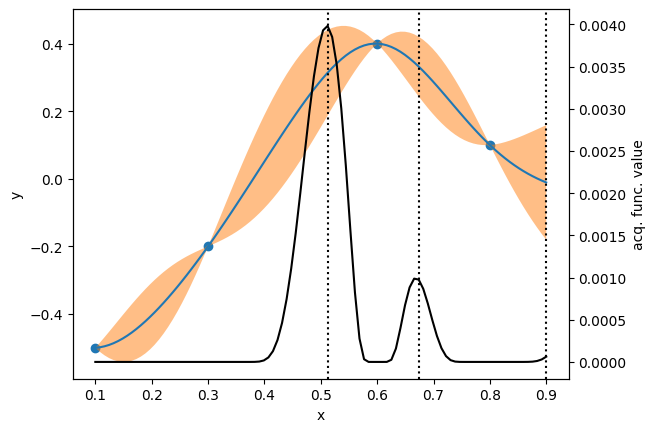

In [4]:
# import the data
X = np.array([[0.1], [0.3], [0.6], [0.8]])
y = np.array([-0.5, -0.2, 0.4, 0.1])

# fit the model
kernel = Matern(length_scale=1.0, nu=2.5)
gp = GaussianProcessRegressor(
    kernel=kernel,
    normalize_y=True,
    n_restarts_optimizer=5,
    random_state=0)

gp.fit(X, y)

# define the candidate space
X_candidates = np.linspace(0.1,0.9,100).reshape(-1, 1)

# use Bayesian Optimization to recommend 3 experiments
acq, i_suggested, x_suggested = suggest_next_experiment(X,
                                                        y,
                                                        X_candidates,
                                                        goal='max',
                                                        model_actual=gp,
                                                        acq_func_name='EI',
                                                        n_suggestions=3,
                                                        kriging_believer='prediction',
                                                        xi=0.1)

# visualize the results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)

y_pred, y_std = gp.predict(X_candidates, return_std=True)

X_candidates_1d = X_candidates.flatten()
ax.plot(X_candidates_1d, y_pred)
ax.fill_between(X_candidates_1d, y_pred - y_std, y_pred + y_std, alpha=0.5)

ax2 = ax.twinx()
ax2.plot(X_candidates_1d, acq[0], c='k')
for x in x_suggested:
    ax.axvline(x, c='k', ls=':')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax2.set_ylabel('acq. func. value')